# 時系列データの分解
時系列データは意図して周期性のあるデータの場合「傾向変動(移動平均)」と「季節変動」と「不規則変動」の和になる。グラフで可視化しただけでは分かりずらいが傾向変動を可視化することで大まかなデータの流れが分かり、季節変動の可視化で周期の中でのデータの特徴が分かる。

# ライブラリのインポート

In [ ]:
from statsmodels import api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データの読み込み

In [ ]:
df = pd.read_csv("chingin.csv", encoding="shift-jis")
df.head()

,月,賃金指数
0,1,83.0
1,2,76.6
2,3,83.7
3,4,79.7
4,5,79.1


In [ ]:
y = df["賃金指数"].values

# 自己相関関数
周期は基本的に下調べ段階で分かるが、周期性について詳細を調べるときに自己相関関数で2番目に大きい値(1番大きい値は関数の特性上最初の値になる)を取る場所から本来の周期が分かる。

In [ ]:
tmpC = []
C = []
for h in range(len(y)):
    for t in range(len(y)-h):
        tmpC.append((y[t]-np.mean(y))*(y[t+h]-np.mean(y)))
    C.append(sum(tmpC)/len(y))
    tmpC = []
r = np.array(C) / C[0]

算出された自己相関係数から周期は12であることが分かる

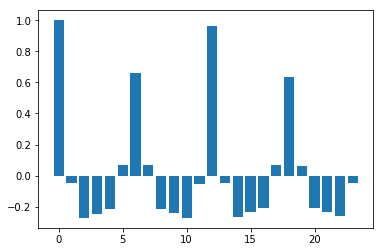

In [ ]:
plt.bar(range(len(r))[0:24], r[0:24])
plt.show()

In [ ]:
np.argmax(r[1:]) + 1

12

# 時系列データの分解

In [ ]:
TSR = sm.tsa.seasonal_decompose(y, freq=np.argmax(r[1:])+1)#バージョンによって「freq」ではなく「period」

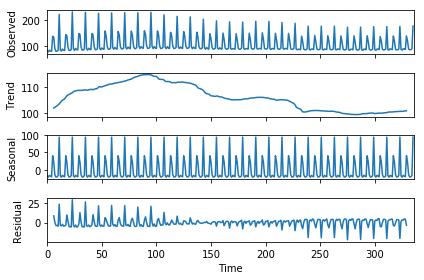

In [ ]:
TSR.plot()
plt.show()

# 傾向変動 T

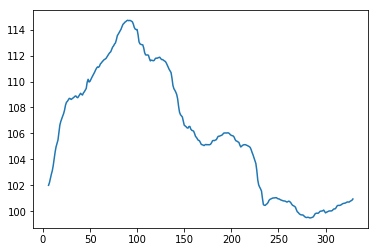

In [ ]:
trend = TSR.trend
plt.plot(trend)
plt.show()

# 季節変動 S

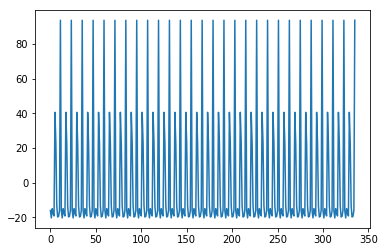

In [ ]:
seasonal = TSR.seasonal
plt.plot(seasonal)
plt.show()

# 不規則変動 R

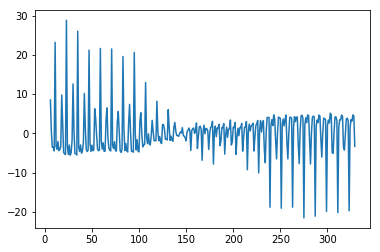

In [ ]:
residual = TSR.resid
plt.plot(residual)
plt.show()